In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background')
#sns.set_theme(style="whitegrid")

# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# enhanced stats functions
from scipy import stats

In [2]:
print(f"pandas version  : {pd.__version__}")  # 1.4.3
print(f"numpy version   : {np.__version__}")  # 1.23.1
print(f"seaborn version : {sns.__version__}") # 0.11.2

pandas version  : 1.4.3
numpy version   : 1.21.5
seaborn version : 0.11.2


In [3]:
SEED = 123
np.random.seed(SEED)

In [4]:
# read in data
df = pd.read_csv("insurance.csv")

In [5]:
# make sure data was read in properly and matches above table
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [6]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Insurance Dataset Profiling Report",html={"style": {'full_width':True}})

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# conduct any other EDA that you need to in order to get a good feel for the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Question 1
#What is the median age of the individuals in our dataset?

In [11]:
# calculate median age
print(df.median(numeric_only=True))

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


In [12]:
#Question 2
#What is the index of the person who has the highest BMI?

In [13]:
# find index of person with highest BMI
#df['bmi'].sort_values(ascending=True)
df[['bmi']].idxmax()

bmi    1317
dtype: int64

In [14]:
#Question 3
#Which two independent numeric variables (excluding categorical and dummy variables) are most highly correlated with each other?


In [15]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


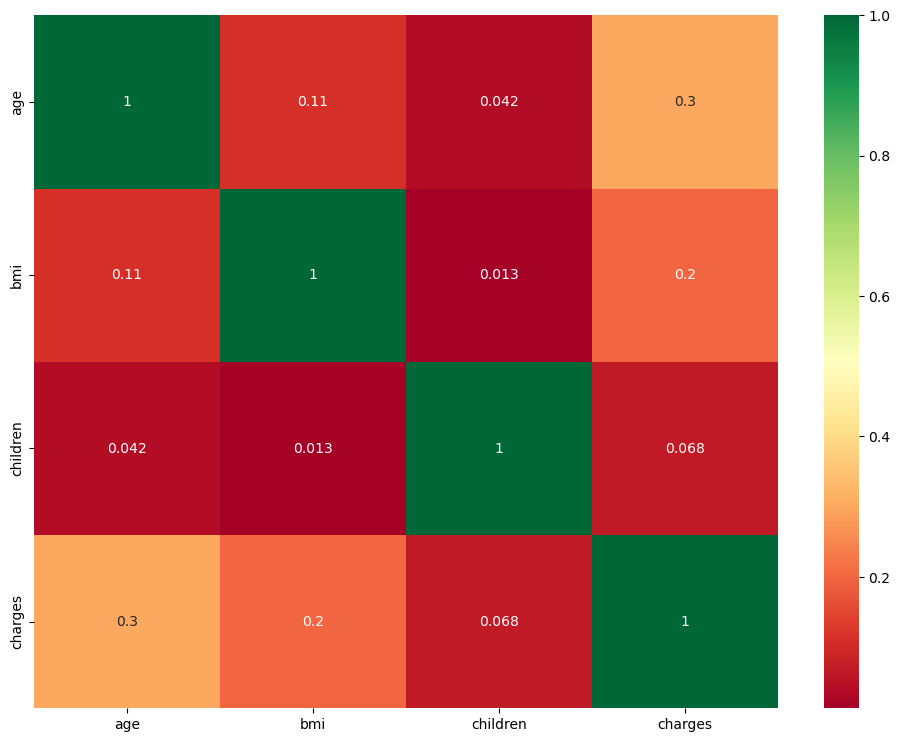

In [16]:
# plot correlation heatmap

plt.figure(figsize=(12, 9))
sns.heatmap(df.loc[:, (df != 0).any(axis=0)].corr(), annot=True,cmap="RdYlGn")
plt.show()

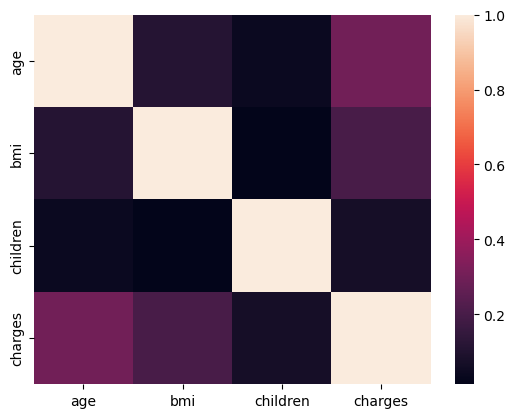

In [17]:
sns.heatmap(df.corr())
plt.show()

In [18]:
#Question 4
#What is the distribution of the charges variable in our dataset?

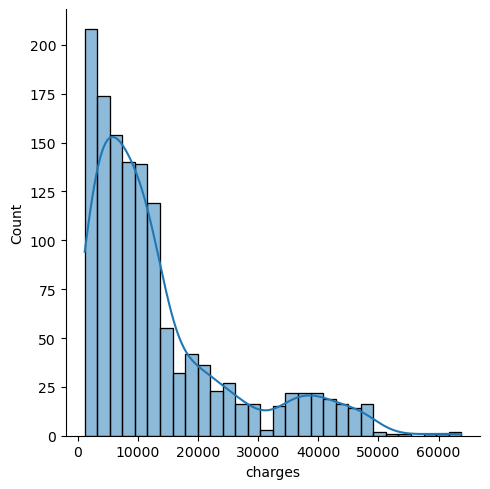

In [19]:
# plot distribution of charges
sns.displot(x='charges',data=df,kde=True)
plt.show()

In [20]:
# take log of charges, then drop old column
df["log_charges"] = np.log(df['charges'])

In [21]:
df = df.drop('charges',axis = 1)

In [22]:
# check if your table matches the one above
df.head(2)

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.90,0,yes,southwest,9.734176
1,18,male,33.77,1,no,southeast,7.453302


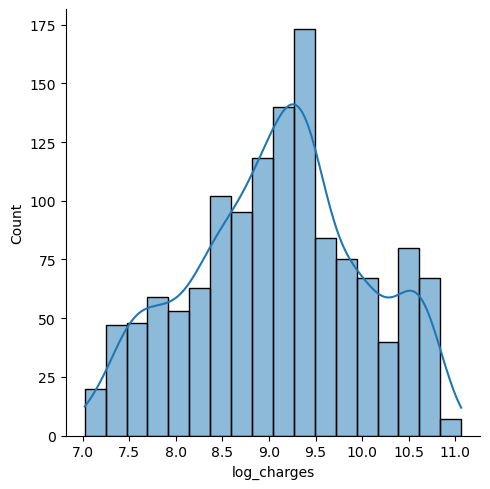

In [23]:
# plot distribution for log_charges
sns.displot(x='log_charges',data=df,kde=True)
plt.show()

In [24]:
# find indexes of duplicated rows
dfd = df[df.duplicated(keep=False)]
dfd = dfd.groupby(list(dfd)).apply(lambda x: tuple(x.index)).tolist()
print (dfd)
df

[(195, 581)]


,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


In [25]:
#Data Wrangling

In [26]:
# get dummies for sex, smoker, and region
df = pd.get_dummies(df, columns=['sex','smoker', 'region'], drop_first=True)
df

,age,bmi,children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1,0,1,0,0
1334,18,31.920,0,7.698927,0,0,0,0,0
1335,18,36.850,0,7.396233,0,0,0,1,0
1336,21,25.800,0,7.604867,0,0,0,0,1


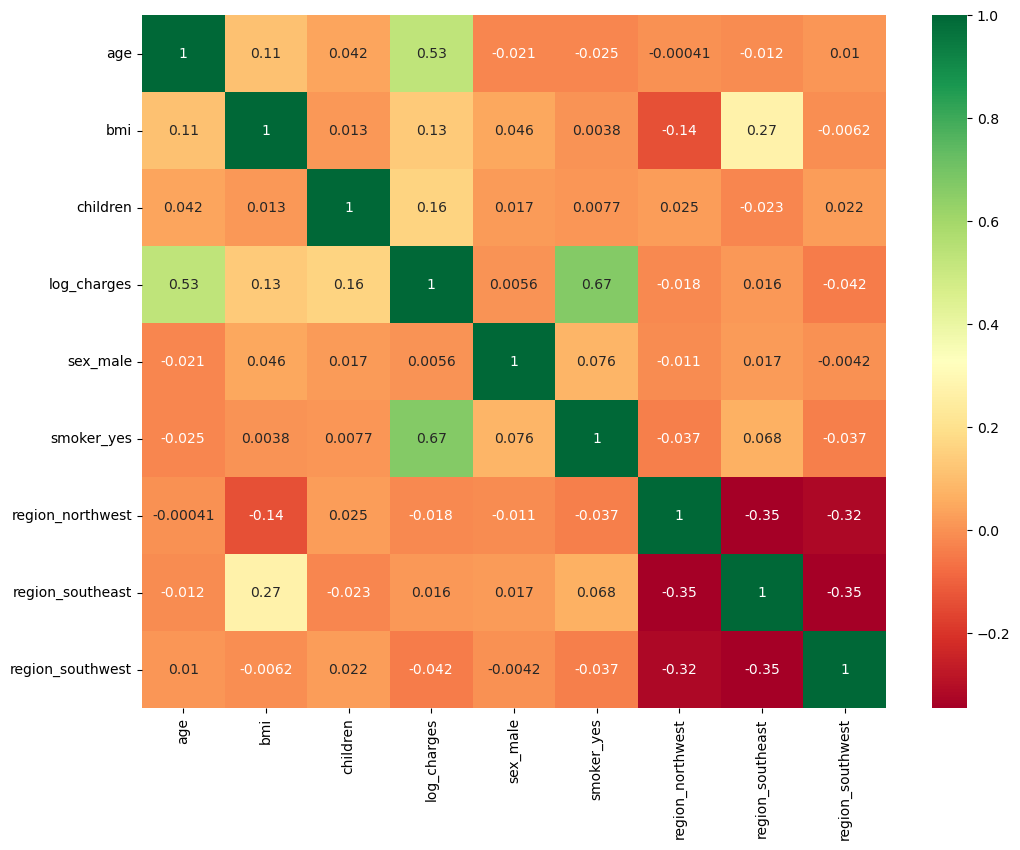

In [27]:
# correlation plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df.loc[:, (df != 0).any(axis=0)].corr(), annot=True,cmap="RdYlGn")
plt.show()

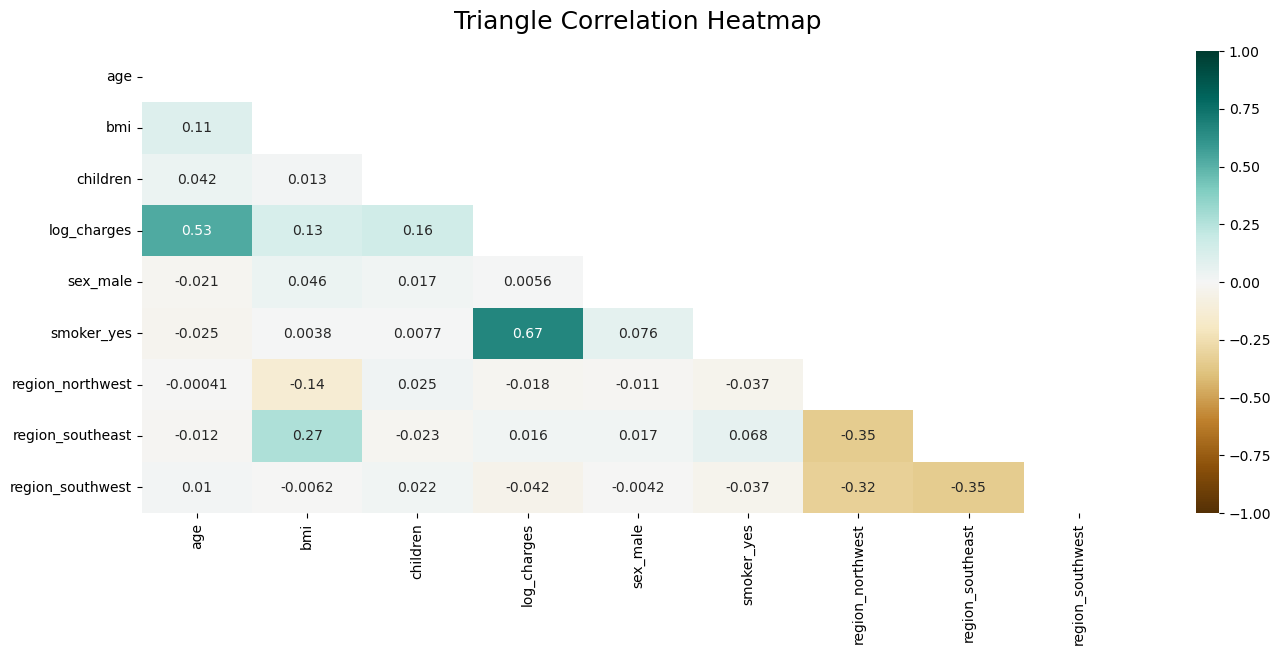

In [28]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

In [29]:
#Question 6

In [30]:
# get number of independent variables
df

,age,bmi,children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1,0,1,0,0
1334,18,31.920,0,7.698927,0,0,0,0,0
1335,18,36.850,0,7.396233,0,0,0,1,0
1336,21,25.800,0,7.604867,0,0,0,0,1


In [31]:
# split up our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df.drop(["log_charges"], axis=1)
X
#vif = pd.DataFrame()
#vif["features"] = X.columns
#vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif)
y = df["log_charges"]

In [32]:
# the resulting shapes of X and y should be (1338, 8) and (1338,) respectively
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [33]:
# do the train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [34]:
#Question 7
#What are the indexes for the first five data points in the training dataset after train_test_split?

In [35]:
print(X_train[:5])

     age    bmi  children  sex_male  smoker_yes  region_northwest  \
300   36  27.55         3         1           0                 0   
904   60  35.10         0         0           0                 0   
670   30  31.57         3         1           0                 0   
617   49  25.60         2         1           1                 0   
373   26  32.90         2         1           1                 0   

     region_southeast  region_southwest  
300                 0                 0  
904                 0                 1  
670                 1                 0  
617                 0                 1  
373                 0                 1  


In [36]:
#Modelling and Evaluation

In [37]:
# instantiate linear regression model and fit the training data to it
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
lr.score(X_train,y_train)

0.7841289883812208

In [40]:
lr.intercept_

6.987675223271668

In [41]:
# describe model
print(f"intercept: {lr.intercept_:.4f}")
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {lr.coef_[i]:.4f}")

intercept: 6.9877
age: 0.0347
bmi: 0.0151
children: 0.1070
sex_male: -0.0837
smoker_yes: 1.5320
region_northwest: -0.0879
region_southeast: -0.1546
region_southwest: -0.1433


In [42]:
#Metric Training data

In [43]:
# predict training set values
predictions_train = lr.predict(X_train)

In [44]:
# evaluate model R^2 (score)
r2_train = r2_score(y_train, predictions_train)
r2_train

0.7607925391061419

In [45]:
# evaluate model MAE
mae_train = mean_absolute_error(y_train, predictions_train)

In [46]:
# evaluate model RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

In [47]:
# print metrics
print("metrics for training data")
print(f"R^2 score : {r2_train:.4f}")
print(f"mae       : {mae_train:.4f}")
print(f"rmse      : {rmse_train:.4f}")

metrics for training data
R^2 score : 0.7608
mae       : 0.2880
rmse      : 0.4557


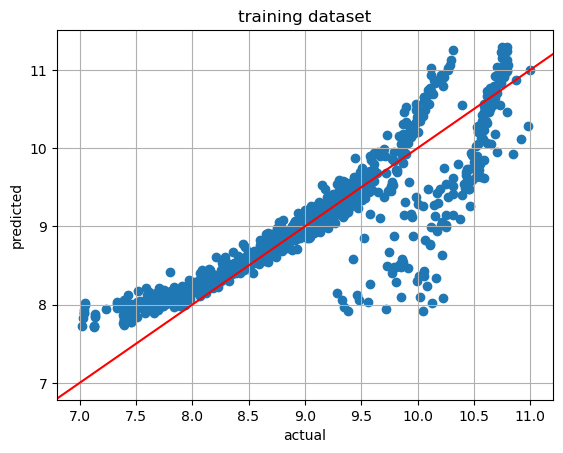

In [48]:
# plot predictions against actual values
plt.scatter(y_train, predictions_train)
plt.title("training dataset")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.gca().axline([7, 7], [11, 11], color="red")
plt.grid()
plt.show()

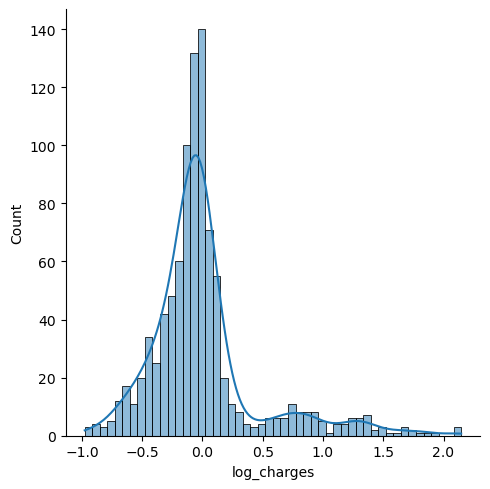

In [49]:
sns.displot((y_train-predictions_train),bins=50, kde=True);
plt.show()

In [50]:
#Evaluate model performance on test data

In [51]:
# make predictions on test set
predictions_test = lr.predict(X_test)

In [52]:
# get same metrics as before - R^2, MAE, RMSE
r2_test = r2_score(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

In [53]:
# print metrics
print("metrics for test data")
print(f"R^2 score : {r2_test:.4f}")
print(f"mae       : {mae_test:.4f}")
print(f"rmse      : {rmse_test:.4f}")

metrics for test data
R^2 score : 0.7841
mae       : 0.2697
rmse      : 0.4129


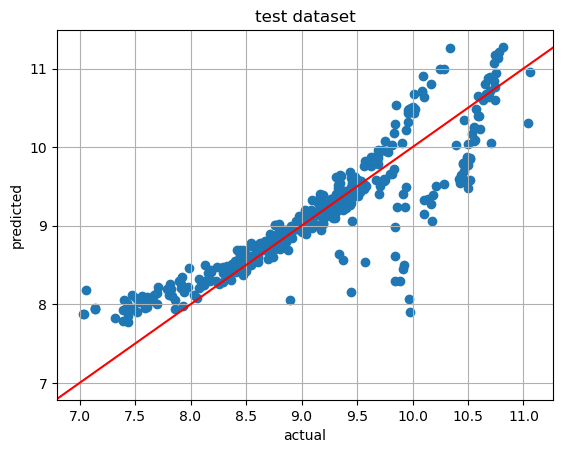

In [54]:
# plot predictions against actual values
plt.scatter(y_test, predictions_test)
plt.title("test dataset")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.gca().axline([7, 7], [11, 11], color="red")
plt.grid()
plt.show()

In [55]:
#Question 8
#Are the residuals normally distributed?

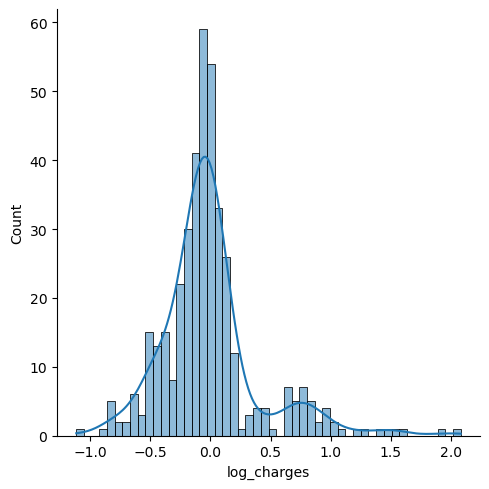

In [56]:
# plot residuals to determine if they are normally distributed
sns.displot((y_test-predictions_test),bins=50, kde=True);
plt.show()

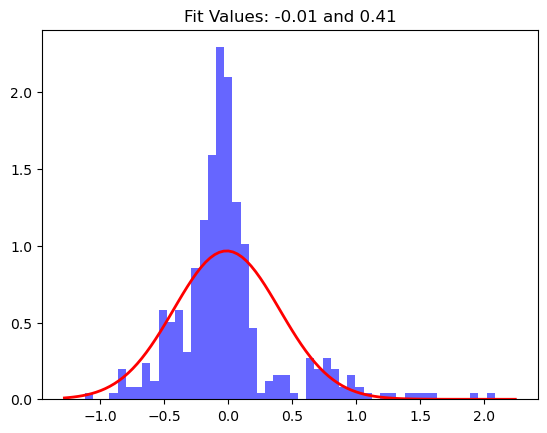

In [57]:
from scipy.stats import norm
data = y_test-predictions_test
mu, std = norm.fit(data) 
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'r', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()


In [58]:
#Question 9
#What are the predicted insurance charges for index 650 (the first row in the test dataset), rounded to 2 decimal places (i.e. nearest cent)?

In [59]:
# get predicted insurance charge for index 650
df['charges'] = np.exp(df['log_charges'])
#print(df.head())
#print(df['charges'])
#charge = charges(650)
#df = df.drop('exp_log_charges',axis = 1)
#df
charge = df.iloc[650]['charges']
charge 

9800.888200000003

In [60]:
# get the predicted insurance charges
print(f"predicted insurance charges: {charge:.2f}")

predicted insurance charges: 9800.89


In [61]:
#Submission Preparation

In [62]:
# replace this with your StackUp name
NAME = "raki"

Name                : raki
intercept           : 6.9877
age: 0.0347
bmi: 0.0151
children: 0.1070
sex_male: -0.0837
smoker_yes: 1.5320
region_northwest: -0.0879
region_southeast: -0.1546
region_southwest: -0.1433
------------------------
predicted insurance charges: 9800.89


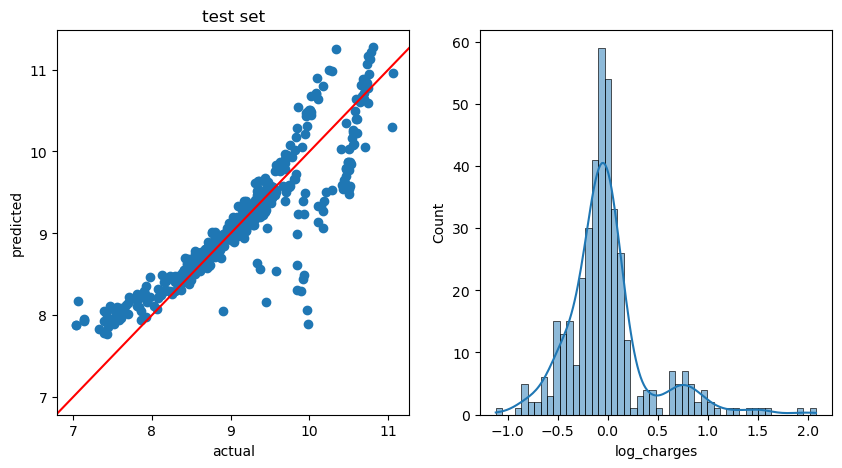

In [63]:
# run this cell, then take a screenshot of the result
print(f"{'Name':<20}: {NAME}")
# describe model
print(f"{'intercept':<20}: {lr.intercept_:.4f}")
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {lr.coef_[i]:.4f}")
print("---"*8)
# get predicted insurance charge for index 650
print(f"predicted insurance charges: {charge:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,5)

# draw plots for test set
# ax1 - scatter plot of predictions vs actual
ax1.scatter(y_test, predictions_test)
ax1.axline([7, 7], [11, 11], color="red")
ax1.set_title("test set")
ax1.set_xlabel("actual")
ax1.set_ylabel("predicted")


# ax2 - residuals plot
sns.histplot((y_test-predictions_test), bins=50, kde=True, ax=ax2)

plt.show()